In [2]:
from ast import arg

import matplotlib.cbook as cbook
import random
import itertools
import copy
import os

from analysis_utils import*
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import defaultdict


In [3]:
methods = ['degree', 'clsBetweenness', 'clsCloseness', 'clsKcore', 'clsEigenvector', 'KMcore_g1', 'KMcore_gf', 
                   'neiNodesNum', 'new_neiNodeSum_1']
methods_rvs = methods[::-1]
msPath = '../../MeasureValuesRanking/NodesMeasures'
msDic = dict()
for net in [25]:
    msDic[net] = dict()
    for ms in methods:
        with open(f'{msPath}/h_{ms}_realNet_{net}.json','r') as f:
            msDic[net][ms] = json.load(f)


In [20]:
# nu = 1 , l = 0.1
mu = 1
nets_paras = {
    25:{'net':25, 'l':[1e-1]}, 
}

In [12]:
# nu=1, l=0.1
# Preprocess it into a dictionary, 
# where the key is the network parameter and the value is a result dictionary 
# (the key is the node number and the value is the node)
Mu = int(mu*10)
with open(f'SIR_25_robust_range_mu{Mu}_add_nu1_1.json', 'r') as f:
    result = json.load(f)

resultDic = defaultdict(dict)
for item in result:
    itemsp = item.split('_')
    net = itemsp[0][1:]
    nu = itemsp[1][2:]
    l = itemsp[2][1:]
    node = itemsp[4][3:]
    resultDic[f'n{net}_nu{nu}_l{l}'][node] = result[item]

In [ ]:
# Generate ground truth rvs file. Only run one time, no need to run again
# calMeasuresNodes(resultDic[f'n{net}_nu{nu}_l{l}'], f'n{net}_nu{nu}_l{l}')


In [8]:
colors = {'new_neiNodeSum_1':'red',
          'degree': 'darkblue', # 'royalblue',
          'clsBetweenness': (168/255, 163/255, 219/255),# plt.cm.tab20(8), #'lavender', 
          'clsCloseness': (198/255, 143/255, 198/255), # 'thistle',  
          'clsKcore':(197/255, 215/255, 192/255), 
          'clsEigenvector': (255/255, 222/255, 153/255), # 'navajowhite', 
          'KMcore_g1': 'darkolivegreen', #'seagreen',
          'KMcore_gf': 'darkgreen', # 'darkolivegreen', 
          'neiNodesNum': (156/255, 176/255, 202/255) , #'lightsteelblue', # 'powderblue', 
          'nodeEdgeEigenvector_linear': (164/255, 114/255, 11/255), # 'darkgoldenrod', # 'darksalmon',  # 'gold',
          'nodeEdgeEigenvector_max': (255/255, 120/255, 0), # 'darkorange',
            }

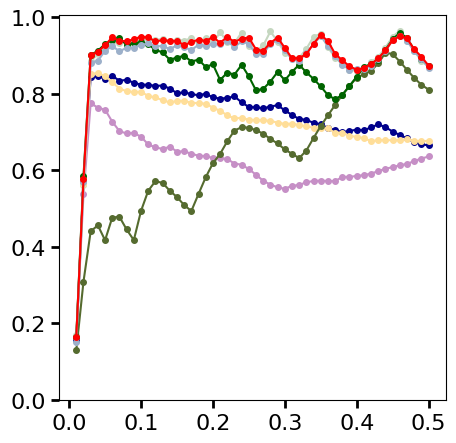

In [15]:
# nu=1, l=0.1
methods = ['degree',   'clsCloseness', 'clsKcore', 'clsEigenvector', 'KMcore_g1', 'KMcore_gf', 
                  'neiNodesNum','new_neiNodeSum_1']
msDic = dict()
net = 25
nu = 1
# l = 5e-2  # ,
l = 1e-1
fLst = np.linspace(0.01, 0.5, 50)
errFunc_ = dict()
jcdFunc_ = dict()
plt.figure(figsize=(5,5))
for ms in methods:
    with open(f'../../MeasureValuesRanking/NodesMeasures/h_{ms}_realNet_{net}.json', "r") as h:
        msDic[ms] = json.load(h)
    errFunc_[ms] = []
    jcdFunc_[ms] = []
    for f in fLst:
        num = int(f*15271)
        if num==0:
            num=1
        gdr =  chooseTopNodes_groundTruth(f'n{net}_nu{nu}_l{l}_rvs', num)
        msnodes = chooseTopNodes_h_realNet(net, ms, num)
        # print(gdr)
        # print(msnodes)
        # erf = sum([resultDic[f'n{net}_nu{nu}_l{l}'][f'{_}'] for _ in msnodes])/sum([resultDic[f'n{net}_nu{nu}_l{l}'][f'{_}'] for _ in gdr])
        jcd = len(set(gdr) & set(msnodes))/len(set(gdr) | set(msnodes))
        # errFunc_[ms].append(erf)
        jcdFunc_[ms].append(jcd)
    plt.plot(fLst, jcdFunc_[ms], label=ms,marker='o', markersize=4, color=colors[ms])
# plt.xlabel("f",fontsize=16)
# plt.ylabel(f"Jaccard coefficient J(f)",fontsize=16)
# plt.xticks(rotation=25)
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(axis='y', labelsize=16)  
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', which='major', size=6, width=2)  
plt.tick_params(axis='x', which='major', size=6, width=2)  
# plt.legend()
# plt.title("threads-math-sx",fontsize=18, fontweight='bold')

plt.show()

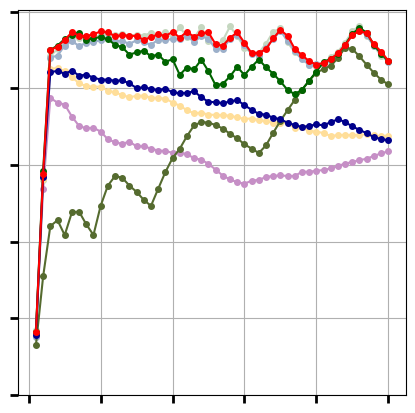

In [16]:
msize = 4
plt.figure(figsize=(5,5))
plt.plot(fLst, jcdFunc_['clsCloseness'], label=ms,marker='o', markersize=msize, color=colors['clsCloseness'])
plt.plot(fLst, jcdFunc_['clsKcore'], label=ms, marker='o', markersize=msize, color=colors['clsKcore'])
plt.plot(fLst, jcdFunc_['clsEigenvector'], label=ms, marker='o', markersize=msize, color=colors['clsEigenvector'])
plt.plot(fLst, jcdFunc_['neiNodesNum'], label=ms, marker='o', markersize=msize, color=colors['neiNodesNum'])
plt.plot(fLst, jcdFunc_['KMcore_g1'], label=ms, marker='o', markersize=msize, color=colors['KMcore_g1'])
plt.plot(fLst, jcdFunc_['KMcore_gf'], label=ms, marker='o', markersize=msize, color=colors['KMcore_gf'])
plt.plot(fLst, jcdFunc_['degree'], label=ms, marker='o', markersize=msize, color=colors['degree'])
plt.plot(fLst, jcdFunc_['new_neiNodeSum_1'], label=ms, marker='o', markersize=msize, color=colors['new_neiNodeSum_1'])

# plt.xlabel("f",fontsize=16, fontweight='bold')
# plt.ylabel(f"Jaccard coefficient J(f)",fontsize=16, fontweight='bold')
# plt.xticks(rotation=25)
plt.tick_params(axis='y', labelsize=16) 
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', which='major', size=6, width=2) 
plt.tick_params(axis='x', which='major', size=6, width=2)  
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
# plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# plt.gca().set_yticklabels([])
# plt.legend()
# plt.title("threads-math-sx",fontsize=18, fontweight='bold')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.grid()
plt.savefig(f'savefig_big/n{net}_nu{nu}_l{l}_grid.svg', format='svg', bbox_inches='tight',dpi=300)

plt.show()

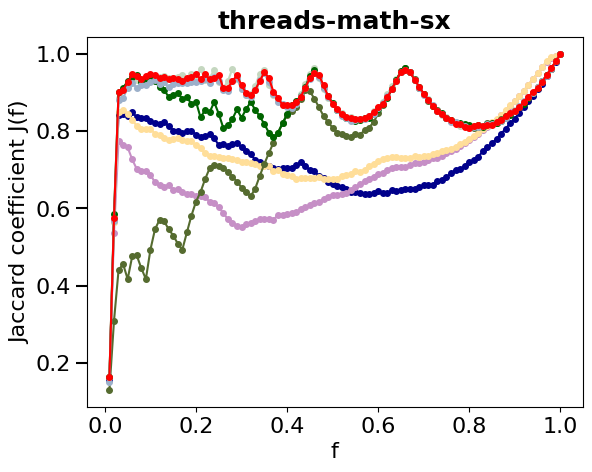

In [18]:
# nu=1, l=0.1
methods = ['degree',   'clsCloseness', 'clsKcore', 'clsEigenvector', 'KMcore_g1', 'KMcore_gf', 
                  'neiNodesNum','new_neiNodeSum_1']
msDic = dict()
net = 25
nu = 1
# l = 5e-2  # ,
l = 1e-1
fLst = np.linspace(0.01, 1, 100)
errFunc_ = dict()
jcdFunc_ = dict()
for ms in methods:
    with open(f'../../MeasureValuesRanking/NodesMeasures/h_{ms}_realNet_{net}.json', "r") as h:
        msDic[ms] = json.load(h)
    errFunc_[ms] = []
    jcdFunc_[ms] = []
    for f in fLst:
        num = int(f*15271)
        if num==0:
            num=1
        gdr =  chooseTopNodes_groundTruth(f'n{net}_nu{nu}_l{l}_rvs', num)# gdr是一个根据传播结果得到的节点排序
        msnodes = chooseTopNodes_h_realNet(net, ms, num)
        # print(gdr)
        # print(msnodes)
        erf = sum([resultDic[f'n{net}_nu{nu}_l{l}'][f'{_}'] for _ in msnodes])/sum([resultDic[f'n{net}_nu{nu}_l{l}'][f'{_}'] for _ in gdr])
        jcd = len(set(gdr) & set(msnodes))/len(set(gdr) | set(msnodes))
        errFunc_[ms].append(erf)
        jcdFunc_[ms].append(jcd)
    # plt.plot(fLst, errFunc_[ms], label=ms,marker='.', color=colors[ms])
    plt.plot(fLst, jcdFunc_[ms], label=ms,marker='o', markersize=4, color=colors[ms])
plt.xlabel("f",fontsize=16)
plt.ylabel(f"Jaccard coefficient J(f)",fontsize=16)
# plt.xticks(rotation=25)
plt.tick_params(axis='y', labelsize=16)  
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', which='major', size=8, width=1.5)  
# plt.legend()
plt.title("threads-math-sx",fontsize=18, fontweight='bold')
plt.show()

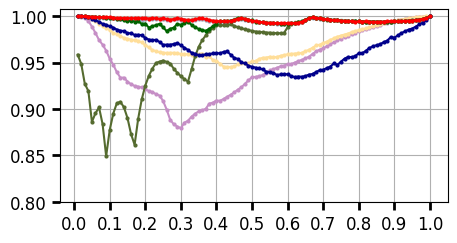

In [19]:
######
# nu=1, l=0.1
msize = 2
plt.figure(figsize=(5,2.5))
plt.plot(fLst, errFunc_['clsCloseness'], label=ms,marker='o', markersize=msize, color=colors['clsCloseness'])
plt.plot(fLst, errFunc_['clsKcore'], label=ms, marker='o', markersize=msize, color=colors['clsKcore'])
plt.plot(fLst, errFunc_['clsEigenvector'], label=ms, marker='o', markersize=msize, color=colors['clsEigenvector'])
plt.plot(fLst, errFunc_['neiNodesNum'], label=ms, marker='o', markersize=msize, color=colors['neiNodesNum'])
plt.plot(fLst, errFunc_['KMcore_g1'], label=ms, marker='o', markersize=msize, color=colors['KMcore_g1'])
plt.plot(fLst, errFunc_['KMcore_gf'], label=ms, marker='o', markersize=msize, color=colors['KMcore_gf'])
plt.plot(fLst, errFunc_['degree'], label=ms, marker='o', markersize=msize, color=colors['degree'])
plt.plot(fLst, errFunc_['new_neiNodeSum_1'], label=ms, marker='o', markersize=msize, color=colors['new_neiNodeSum_1'])

fontsize1 = 12
# plt.xlabel("f",fontsize=16, fontweight='bold')
# plt.ylabel(f"Jaccard coefficient J(f)",fontsize=16, fontweight='bold')
# plt.xticks(rotation=25)
plt.tick_params(axis='y', labelsize=fontsize1) 
plt.tick_params(axis='x', labelsize=fontsize1)
plt.tick_params(axis='y', which='major', size=6, width=2)  
plt.tick_params(axis='x', which='major', size=6, width=2)  
# plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5])
plt.yticks([0.8,0.85,0.9,0.95,1.0])
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# plt.gca().set_yticklabels([])
# plt.legend()
# plt.title("threads-math-sx",fontsize=18, fontweight='bold')
# plt.gca().set_xticklabels([])
# plt.gca().set_yticklabels([])
plt.grid()
plt.savefig(f'savefig_big/err_n{net}_nu{nu}_l{l}_grid.svg', format='svg', bbox_inches='tight',dpi=300)

plt.show()

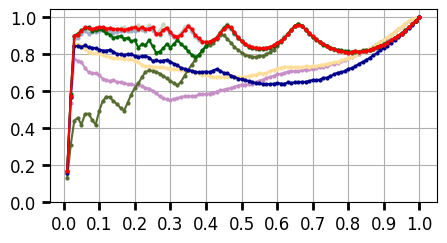

In [20]:
######
# nu=1, l=0.1
msize = 2
plt.figure(figsize=(5,2.5))
plt.plot(fLst, jcdFunc_['clsCloseness'], label=ms,marker='o', markersize=msize, color=colors['clsCloseness'])
plt.plot(fLst, jcdFunc_['clsKcore'], label=ms, marker='o', markersize=msize, color=colors['clsKcore'])
plt.plot(fLst, jcdFunc_['clsEigenvector'], label=ms, marker='o', markersize=msize, color=colors['clsEigenvector'])
plt.plot(fLst, jcdFunc_['neiNodesNum'], label=ms, marker='o', markersize=msize, color=colors['neiNodesNum'])
plt.plot(fLst, jcdFunc_['KMcore_g1'], label=ms, marker='o', markersize=msize, color=colors['KMcore_g1'])
plt.plot(fLst, jcdFunc_['KMcore_gf'], label=ms, marker='o', markersize=msize, color=colors['KMcore_gf'])
plt.plot(fLst, jcdFunc_['degree'], label=ms, marker='o', markersize=msize, color=colors['degree'])
plt.plot(fLst, jcdFunc_['new_neiNodeSum_1'], label=ms, marker='o', markersize=msize, color=colors['new_neiNodeSum_1'])

fontsize1 = 12
# plt.xlabel("f",fontsize=16, fontweight='bold')
# plt.ylabel(f"Jaccard coefficient J(f)",fontsize=16, fontweight='bold')
# plt.xticks(rotation=25)
plt.tick_params(axis='y', labelsize=fontsize1)  
plt.tick_params(axis='x', labelsize=fontsize1)
plt.tick_params(axis='y', which='major', size=6, width=2)  
plt.tick_params(axis='x', which='major', size=6, width=2)  
# plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# plt.gca().set_yticklabels([])
# plt.legend()
# plt.title("threads-math-sx",fontsize=18, fontweight='bold')
# plt.gca().set_xticklabels([])
# plt.gca().set_yticklabels([])
plt.grid()
plt.savefig(f'savefig_big/fr_n{net}_nu{nu}_l{l}_grid.svg', format='svg', bbox_inches='tight',dpi=300)

plt.show()